<a href="https://colab.research.google.com/github/Brian-Onyango/Silicon-Valley-Company-Employees-Data-Analysis/blob/main/Company_Employees_Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# People Analytics 

> You work on the People Analytics team at a local start up in the
Silicon Valley. The company you work for has been rapidly
growing over the past few months and your manager wants you
to analyze the workforce. The company you work for prides
itself in their company culture. Only 150 employees have
departed the company (either voluntary or involuntary) since the
company was formed back in 2016.




## 1. Defining the Question

### a) Specifying the Question

>
* To do an analysis on Peoples Analytics data



### b) Defining the Metric for Success

This project will be successful when: 

* The end goal is to present a 5-slide PowerPoint deck to the
manager and the CHRO


### c) Understanding the context 

>The data came from a Qualtrics survey, but you do not
actually need to use Qualtrics for this assignment. You should be
using Excel and Python the most for this & a Tableau and/or
Excel dashboard to supplement your Power Point presentation is
strongly recommended (if you do both, you could receive extra
credit)


### d) Recording the Experimental Design

Experimental Procedure:

To get you started, this task has 4 parts to it; and it is up to you
to figure out all steps required to answer the following
questions:

1. Descriptive:
What is happening in the data?
2. Diagnostic:
Why is it happening?
3. Predictive:
What is going to happen?
4. Prescriptive:
What should the company do?

 



### e) Data Relevance

The dataset to use for this project can be found by following this link:
* [Dataset ](https://docs.google.com/spreadsheets/d/1-GJmqnfYYdwLW-VeE_qMlNJT30UTAnuv/edit?usp=sharing&ouid=113952257686505560356&rtpof=true&sd=true)



## 2. Reading the Data

In [ ]:
# Installing packages
!pip install factor_analyzer==0.2.3
!pip install tldextract
!pip install selenium
!pip install imbalanced-learn
!pip install wordcloud
!pip install selenium

     |████████████████████████████████| 93 kB 2.0 MB/s 
     |████████████████████████████████| 979 kB 30.6 MB/s 
     |████████████████████████████████| 359 kB 53.9 MB/s 
     |████████████████████████████████| 138 kB 50.2 MB/s 
     |████████████████████████████████| 55 kB 4.9 MB/s 
     |████████████████████████████████| 4.0 MB 32.8 MB/s 
     |████████████████████████████████| 58 kB 6.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
from scipy import stats
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import tldextract
import time
from nltk.tokenize import RegexpTokenizer 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.pipeline import make_pipeline 
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver 
import networkx as nx 
import pickle
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imblearn.over_sampling import SMOTE
from collections import Counter
import tensorflow as tf
from selenium import webdriver
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
from collections import Counter
sb.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/emmanuel')

Mounted at /content/drive


In [ ]:
# Loading the Dataset 
df = pd.read_excel('final_project.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

(1388, 32)


In [ ]:
# Previewing the top of our dataset
df.head()

,employee_1,gender_1,age,department,status,tenure,turnover,turnover1,annual_compensation,country,...,connection,intention_to_quit,clear_expectations_from_manager,proud,believe_in_mission,trust_in_leadership,marital_status,kids,education,race
0,1,Female,22,Research & Development,Part Time,1.5,NaN,NaN,78009.6900,CA,...,2.0,3.0,2.0,1.0,3.0,1.0,married,0.0,AS,White
1,2,Female,21,Research & Development,Part Time,0.5,NaN,NaN,47869.5825,CA,...,1.0,2.0,1.0,1.0,1.0,1.0,married,2.0,BA,White
2,5,Female,21,Research & Development,Full Time,0.5,NaN,NaN,40777.7925,CA,...,2.0,3.0,1.0,3.0,4.0,2.0,married,2.0,BA,White
3,6,Female,29,Sales,Full Time,1.5,NaN,NaN,47514.9930,CA,...,2.0,6.0,3.0,2.0,4.0,3.0,married,1.0,MS,Black
4,7,Female,21,Human Resources,Full Time,0.5,NaN,NaN,56734.3200,CA,...,2.0,6.0,4.0,4.0,4.0,3.0,married,0.0,BA,White


In [ ]:
# Previewing the bottom of our dataset
df.tail() 

,employee_1,gender_1,age,department,status,tenure,turnover,turnover1,annual_compensation,country,...,connection,intention_to_quit,clear_expectations_from_manager,proud,believe_in_mission,trust_in_leadership,marital_status,kids,education,race
1383,1369,Male,28,Research & Development,Full Time,1.5,NaN,NaN,92000.0,US,...,2.0,1.0,3.0,3.0,1.0,1.0,single,0.0,AA,Hispanic
1384,1370,Female,41,Research & Development,Full Time,2.0,NaN,NaN,110000.0,US,...,1.0,7.0,7.0,7.0,3.0,2.0,married,NaN,MS,white
1385,1371,Male,41,Research & Development,Part Time,2.5,NaN,NaN,79000.0,US,...,2.0,1.0,1.0,1.0,2.0,2.0,single,NaN,BS,White
1386,1373,Male,56,Marketing,Part time,3.0,NaN,NaN,83000.0,US,...,2.0,7.0,7.0,7.0,4.0,2.0,married,2.0,AA,African American
1387,1379,Male,63,Operations,Part Time,3.0,NaN,NaN,100000.0,US,...,2.0,1.0,1.0,3.0,2.0,3.0,single,NaN,AA,Hispanic


In [ ]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   employee_1                       1388 non-null   int64  
 1   gender_1                         1388 non-null   object 
 2   age                              1388 non-null   int64  
 3   department                       1388 non-null   object 
 4   status                           1385 non-null   object 
 5   tenure                           1388 non-null   float64
 6   turnover                         150 non-null    object 
 7   turnover1                        150 non-null    object 
 8   annual_compensation              1303 non-null   float64
 9   country                          1388 non-null   object 
 10  job_satisfaction                 1387 non-null   float64
 11  engagement                       1387 non-null   float64
 12  proactive           

## 4. External Data Source Validation

> We don't have any other external data set to compare with this data set

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [ ]:
# Checking for irrelevant columns
df.columns

Index(['employee_1', 'gender_1', 'age', 'department', 'status', 'tenure',
       'turnover', 'turnover1', 'annual_compensation', 'country',
       'job_satisfaction', 'engagement', 'proactive', 'worklifebalance',
       'performance_individual', 'performance_manager', 'career_satisfaction',
       'meaning', 'autonomy', 'growth', 'impact', 'recommend', 'connection',
       'intention_to_quit', 'clear_expectations_from_manager', 'proud',
       'believe_in_mission', 'trust_in_leadership', 'marital_status', 'kids',
       'education', 'race'],
      dtype='object')

> All columns are relevant

### b. Completeness

In [ ]:
# Checking for missing values
df.isnull().any().any()

True

In [ ]:
# Identifying the Missing Data
df.isnull().sum()

employee_1                            0
gender_1                              0
age                                   0
department                            0
status                                3
tenure                                0
turnover                           1238
turnover1                          1238
annual_compensation                  85
country                               0
job_satisfaction                      1
engagement                            1
proactive                             6
worklifebalance                       3
performance_individual               54
performance_manager                   1
career_satisfaction                   4
meaning                               4
autonomy                              6
growth                                1
impact                                6
recommend                             4
connection                            3
intention_to_quit                     8
clear_expectations_from_manager       9


> We have missing values

In [ ]:
# Checking percentage of missing values per columns
missing_columns = []
for i, col in enumerate(df.columns):
  missing = (df[col].isnull().sum()/df.shape[0])*100
  if missing > 0:
    missing_columns.append(col)
  print(f'{i+1}. {col} = {(df[col].isnull().sum()/df.shape[0])*100}%')

1. employee_1 = 0.0%
2. gender_1 = 0.0%
3. age = 0.0%
4. department = 0.0%
5. status = 0.21613832853025938%
6. tenure = 0.0%
7. turnover = 89.19308357348703%
8. turnover1 = 89.19308357348703%
9. annual_compensation = 6.123919308357348%
10. country = 0.0%
11. job_satisfaction = 0.07204610951008646%
12. engagement = 0.07204610951008646%
13. proactive = 0.43227665706051877%
14. worklifebalance = 0.21613832853025938%
15. performance_individual = 3.890489913544669%
16. performance_manager = 0.07204610951008646%
17. career_satisfaction = 0.2881844380403458%
18. meaning = 0.2881844380403458%
19. autonomy = 0.43227665706051877%
20. growth = 0.07204610951008646%
21. impact = 0.43227665706051877%
22. recommend = 0.2881844380403458%
23. connection = 0.21613832853025938%
24. intention_to_quit = 0.5763688760806917%
25. clear_expectations_from_manager = 0.6484149855907781%
26. proud = 0.8645533141210375%
27. believe_in_mission = 0.5043227665706052%
28. trust_in_leadership = 0.43227665706051877%
29. 

> turnover = 89.19308357348703% and turnover1 = 89.19308357348703% has the highest missing values. However, we will not drop the columns since they form an integral part of our analysis

In [ ]:
# The columns with missing values
missing_columns

['status',
 'turnover',
 'turnover1',
 'annual_compensation',
 'job_satisfaction',
 'engagement',
 'proactive',
 'worklifebalance',
 'performance_individual',
 'performance_manager',
 'career_satisfaction',
 'meaning',
 'autonomy',
 'growth',
 'impact',
 'recommend',
 'connection',
 'intention_to_quit',
 'clear_expectations_from_manager',
 'proud',
 'believe_in_mission',
 'trust_in_leadership',
 'marital_status',
 'kids',
 'education',
 'race']

Dealing with the main missing data points turnover = 89.19308357348703% and turnover1 = 89.19308357348703%

In [ ]:
# Unique values in turnover
df.turnover.unique()

array([nan, 'yes', 'Yes'], dtype=object)

In [ ]:
# will fill the nan values with 'no'
df.turnover.fillna('no', inplace = True)

In [ ]:
# Unique values in turnover1
df.turnover1.unique()

array([nan, 'voluntary', 'involuntary'], dtype=object)

In [ ]:
# will fill the nan values with 'no'
df.turnover1.fillna('no', inplace = True)

In [ ]:
# Checking for null values again
df.isnull().sum()

employee_1                          0
gender_1                            0
age                                 0
department                          0
status                              3
tenure                              0
turnover                            0
turnover1                           0
annual_compensation                85
country                             0
job_satisfaction                    1
engagement                          1
proactive                           6
worklifebalance                     3
performance_individual             54
performance_manager                 1
career_satisfaction                 4
meaning                             4
autonomy                            6
growth                              1
impact                              6
recommend                           4
connection                          3
intention_to_quit                   8
clear_expectations_from_manager     9
proud                              12
believe_in_m

> Our data is relatively complete now. Other columns are too sentsitive do be statistically be filled.

### c. Consistency

In [ ]:
# Checking for duplicates
df.duplicated().any().any()

False

> There are no duplicates in this dataset

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

(1388, 32)


### d. Uniformity

In [ ]:
# Checking column names
df.columns

Index(['employee_1', 'gender_1', 'age', 'department', 'status', 'tenure',
       'turnover', 'turnover1', 'annual_compensation', 'country',
       'job_satisfaction', 'engagement', 'proactive', 'worklifebalance',
       'performance_individual', 'performance_manager', 'career_satisfaction',
       'meaning', 'autonomy', 'growth', 'impact', 'recommend', 'connection',
       'intention_to_quit', 'clear_expectations_from_manager', 'proud',
       'believe_in_mission', 'trust_in_leadership', 'marital_status', 'kids',
       'education', 'race'],
      dtype='object')

> The columns naming is uniform

In [ ]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()
# Checking changes
df.columns

Index(['employee_1', 'gender_1', 'age', 'department', 'status', 'tenure',
       'turnover', 'turnover1', 'annual_compensation', 'country',
       'job_satisfaction', 'engagement', 'proactive', 'worklifebalance',
       'performance_individual', 'performance_manager', 'career_satisfaction',
       'meaning', 'autonomy', 'growth', 'impact', 'recommend', 'connection',
       'intention_to_quit', 'clear_expectations_from_manager', 'proud',
       'believe_in_mission', 'trust_in_leadership', 'marital_status', 'kids',
       'education', 'race'],
      dtype='object')

### e. Outliers

In [ ]:
# Creating an outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [ ]:
# Checking for Outliers
outliers(df)

Number of outliers = 989
Percentage = 71.25360230547551%


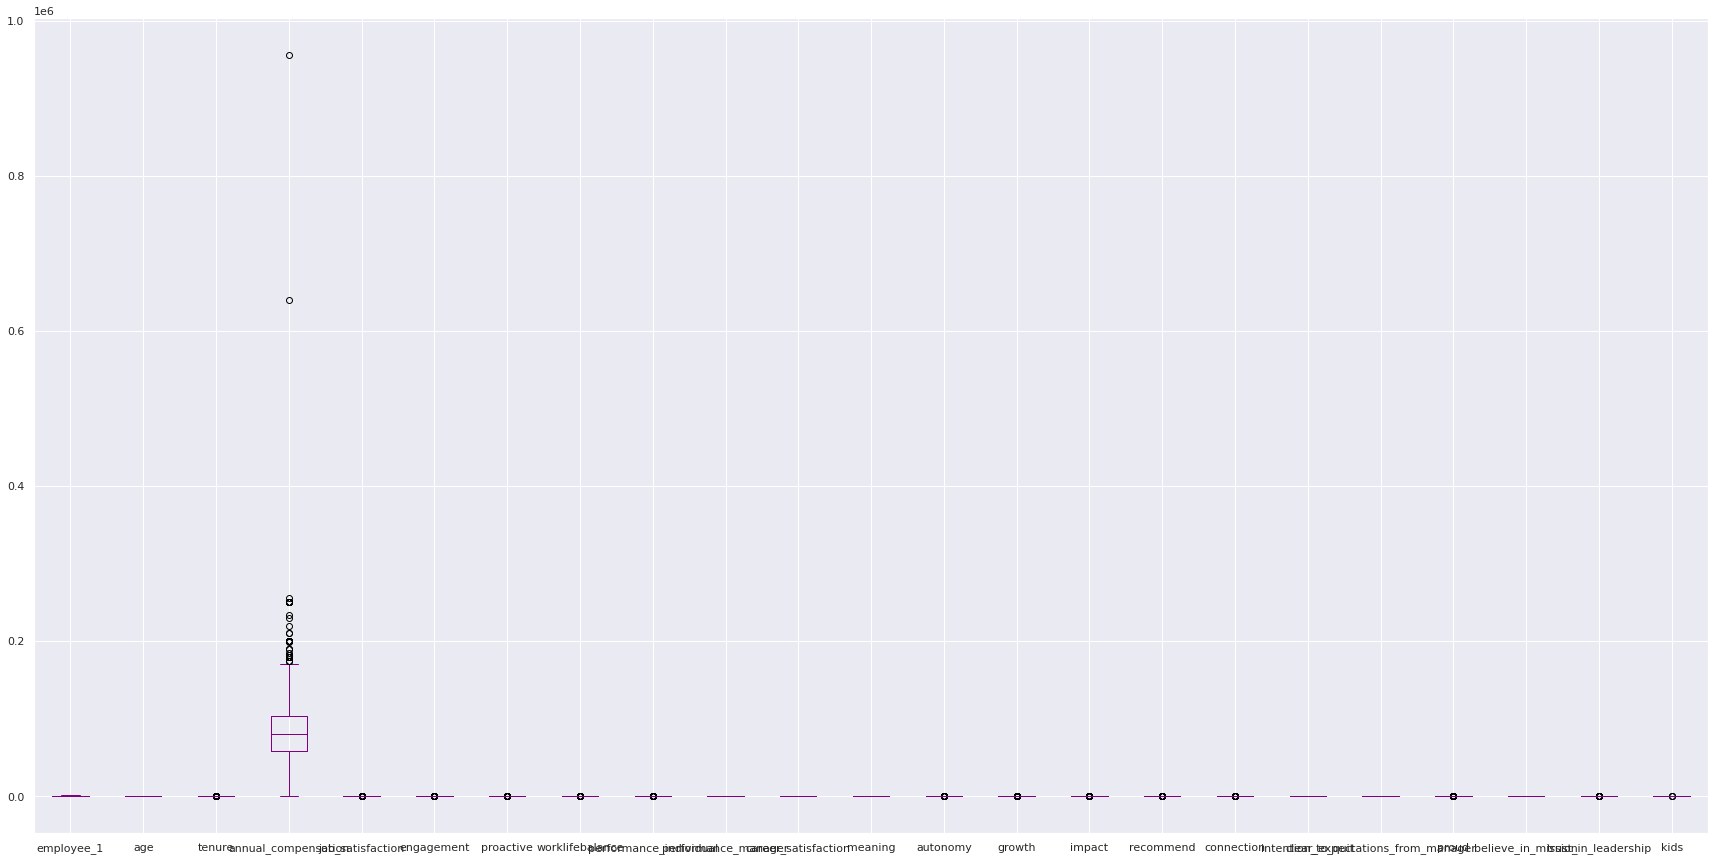

In [ ]:
# Viewing the outliers
df.boxplot(figsize=(30,15),color='purple')

All columns are not having outliers except in annual_compensation column

### f. Anomalies

In [ ]:
# Checking for Anomalies
df.describe()

,employee_1,age,tenure,annual_compensation,job_satisfaction,engagement,proactive,worklifebalance,performance_individual,performance_manager,...,growth,impact,recommend,connection,intention_to_quit,clear_expectations_from_manager,proud,believe_in_mission,trust_in_leadership,kids
count,1388.000000,1388.000000,1388.000000,1303.000000,1387.000000,1387.000000,1382.000000,1385.000000,1334.000000,1387.000000,...,1387.000000,1382.000000,1384.000000,1385.000000,1380.000000,1379.000000,1376.000000,1381.000000,1382.000000,1318.000000
mean,694.500000,39.776657,1.877522,85843.592477,2.648882,4.306417,3.487699,4.361011,3.232384,3.387167,...,2.053353,1.934153,1.632225,1.679422,2.884783,2.545323,2.486919,2.735699,2.317656,1.279211
std,400.825398,11.676015,0.791619,47173.549630,0.945867,0.743792,0.854045,0.744680,0.801331,1.077479,...,0.815635,0.754906,0.653044,0.657144,1.790046,1.887226,1.759703,1.106152,1.004533,1.201508
min,1.000000,18.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,347.750000,31.000000,1.500000,58930.928500,2.000000,4.000000,3.000000,4.000000,3.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,694.500000,41.000000,2.000000,80000.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,1041.250000,48.000000,2.000000,104000.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
max,1388.000000,70.000000,3.500000,956000.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,5.000000,4.000000,5.000000,7.000000,7.000000,7.000000,5.000000,5.000000,8.000000


> The average annual salary is 85843.59 and the max salary is 956000, this justifies the anomaly in the employees salary

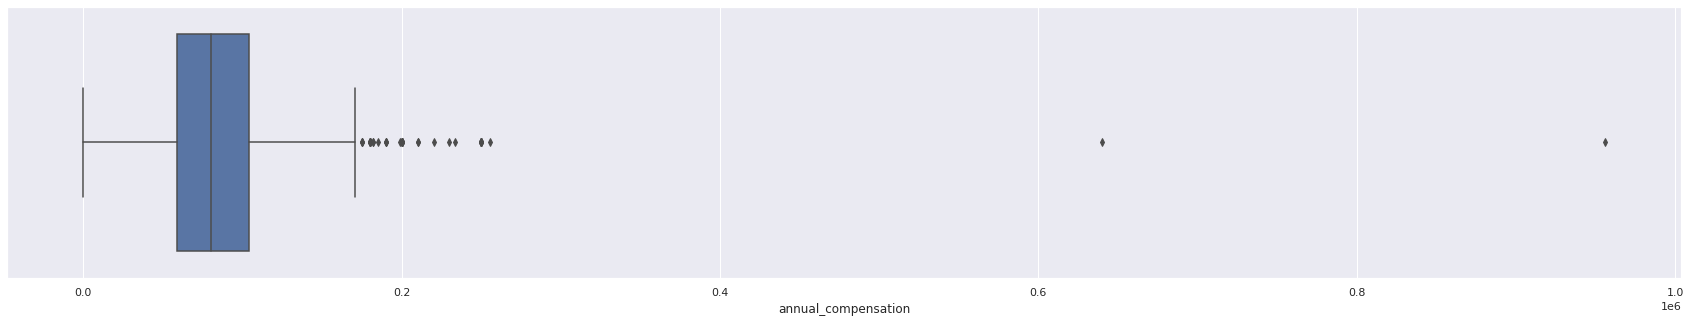

In [ ]:
sb.boxplot(df.annual_compensation)

## 6. Exploratory Descriptive Analysis

#### a) Univariate Analysis

##### Categorical Analysis

> Frequecy tables, Bar Charts, Histograms, Pie charts etc.

In [ ]:
# Number of unique values
cols = df.columns.tolist()
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(df[col].unique().tolist())}')

Number of unique values

employee_1: 1388
gender_1: 3
age: 51
department: 8
status: 5
tenure: 7
turnover: 3
turnover1: 3
annual_compensation: 364
country: 2
job_satisfaction: 6
engagement: 6
proactive: 6
worklifebalance: 6
performance_individual: 5
performance_manager: 6
career_satisfaction: 6
meaning: 6
autonomy: 6
growth: 6
impact: 6
recommend: 5
connection: 6
intention_to_quit: 8
clear_expectations_from_manager: 8
proud: 8
believe_in_mission: 6
trust_in_leadership: 6
marital_status: 3
kids: 10
education: 7
race: 11


In [ ]:
# Keenly checking on gender colum
df.gender_1.unique()

array(['Female', 'Male', 'female'], dtype=object)

In [ ]:
# Replacing female with Female
df.gender_1.replace('female', 'Female', inplace =True)

In [ ]:
df.gender_1.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Keenly checking on turnover column
df.turnover.unique()

array(['no', 'yes', 'Yes'], dtype=object)

In [ ]:
# Replacing Yes with yes
df.turnover.replace('Yes', 'yes', inplace =True)

In [ ]:
df.turnover.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
# Keenly checking on race column
df.race.unique()

array(['White', 'Black', 'Caucasian', 'Hispanic', 'white',
       'Pacific Islander', 'hispanic', nan, 'pacific Islander',
       'African American', 'African American '], dtype=object)

In [ ]:
# Replacing white with White
df.race.replace('white', 'White', inplace =True)
# Replacing hispanic with Hispanic
df.race.replace('hispanic', 'Hispanic', inplace =True)
# Replacing pacific Islander with Pacific Islander
df.race.replace('pacific Islander', 'Pacific Islander', inplace =True)
# Replacing 'African American ' with 'African American'
df.race.replace('African American ', 'African American', inplace =True)

In [ ]:
df.race.unique()

array(['White', 'Black', 'Caucasian', 'Hispanic', 'Pacific Islander', nan,
       'African American'], dtype=object)

In [ ]:
# columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# categorical columns
object_columns

Index(['gender_1', 'department', 'status', 'turnover', 'turnover1', 'country',
       'marital_status', 'education', 'race'],
      dtype='object')

In [ ]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (20,10))
  sb.countplot(data[column], palette = 'viridis', orient = 'v',order = data[column].value_counts().index)
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

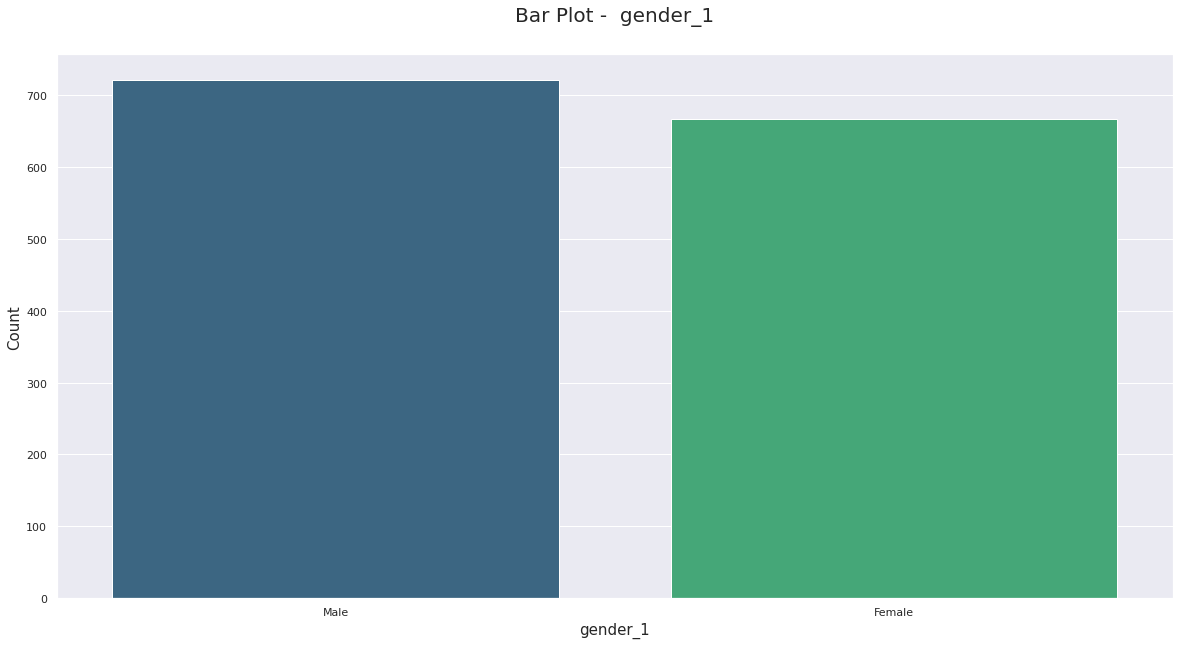

In [ ]:
# Gender count plot
CatPlots('gender_1', df)

> Males are more than Female

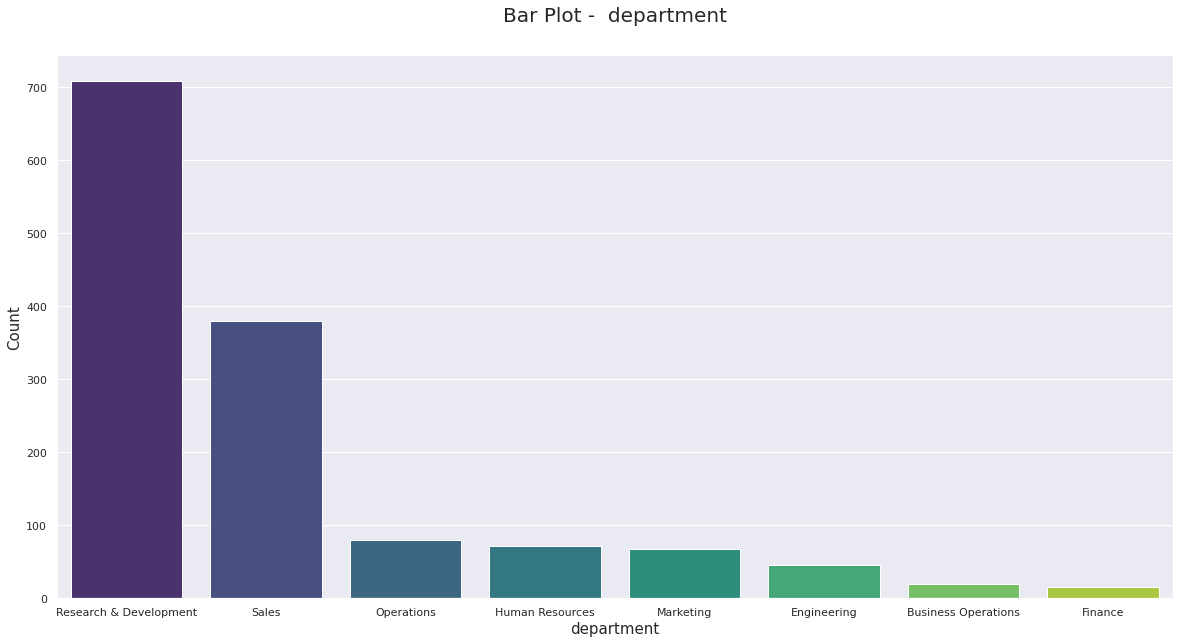

In [ ]:
# department count plot
CatPlots('department', df)

> Research & Developemnet has the highest number of employees

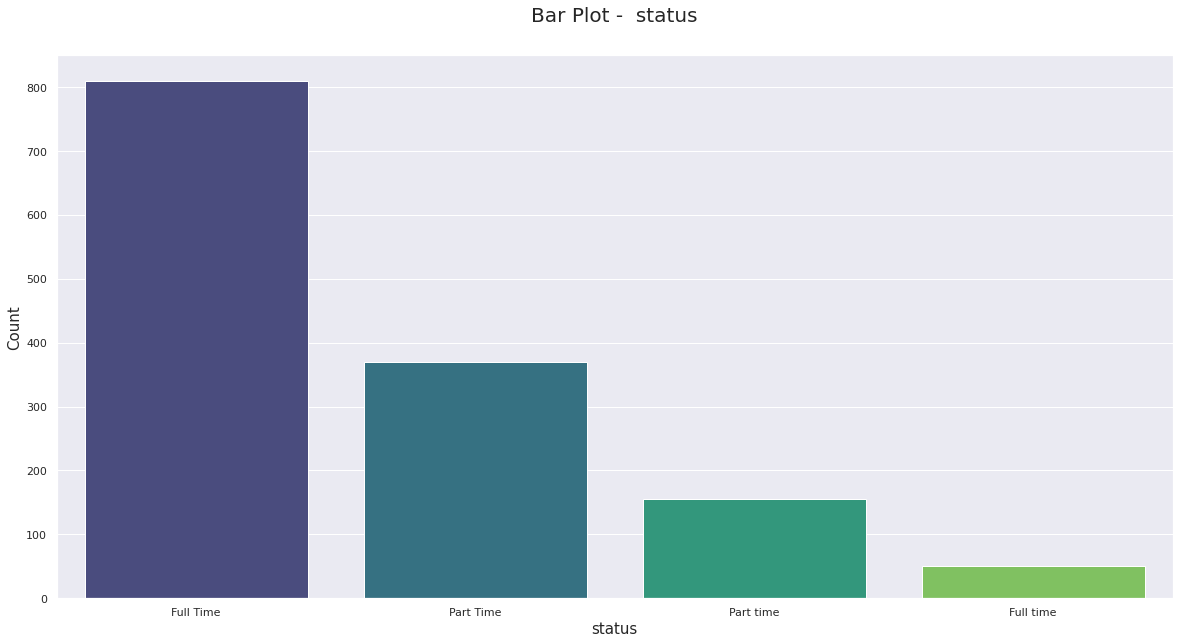

In [ ]:
# status count plot
CatPlots('status', df)

Full time employees are the majority

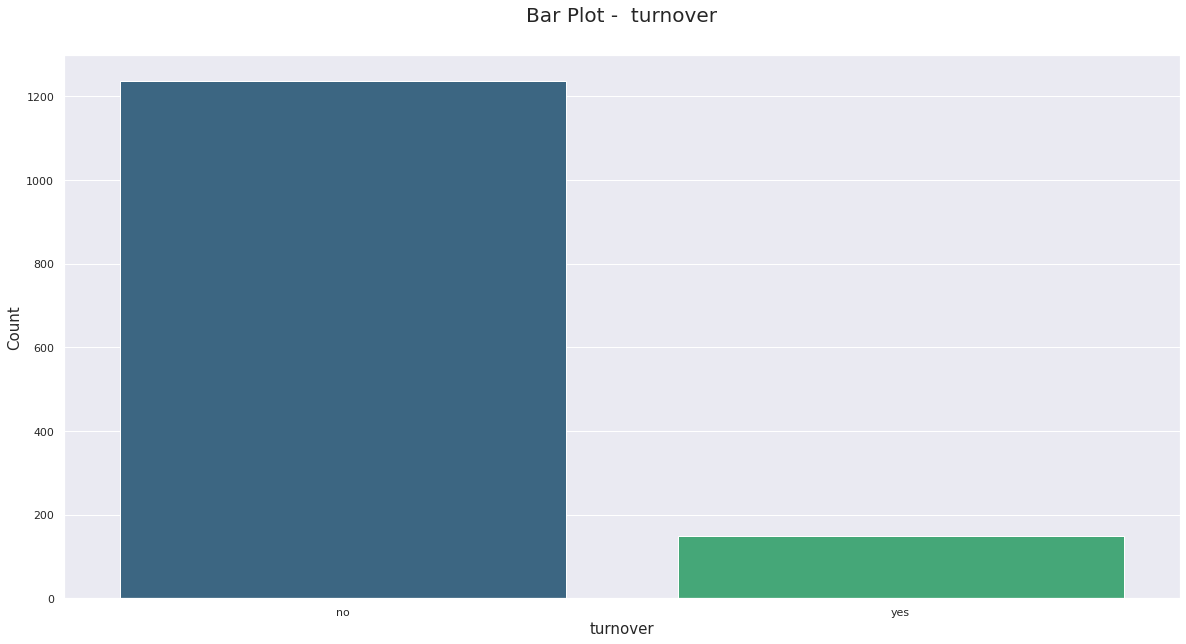

In [ ]:
# turnover count plot
CatPlots('turnover', df)

Less than 200 employees left the company

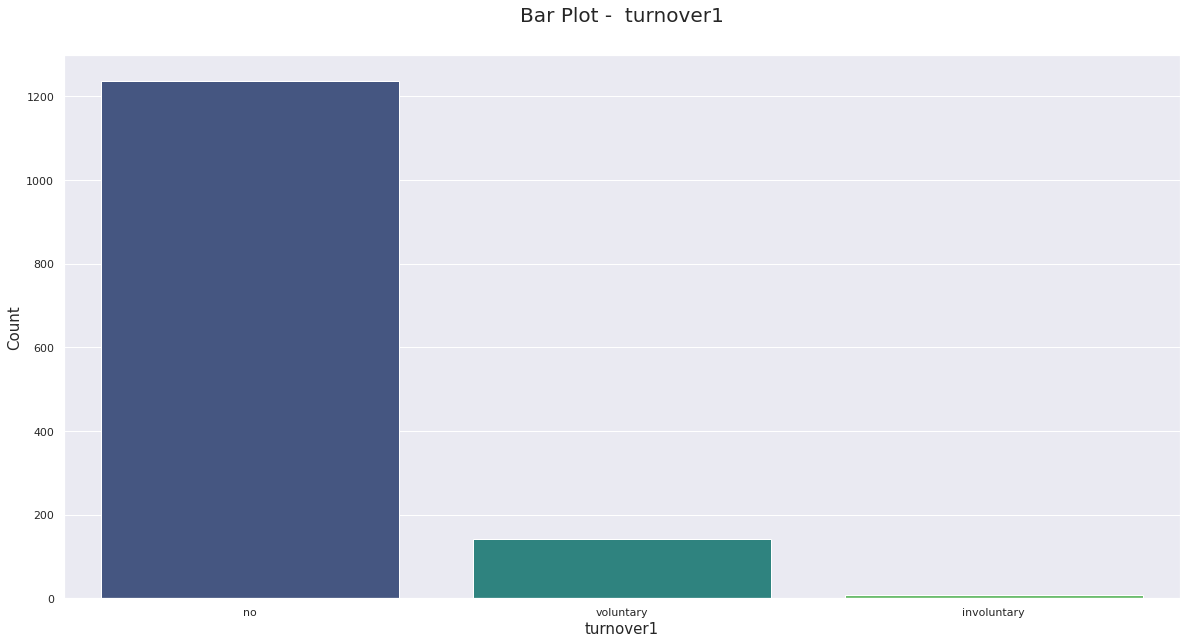

In [ ]:
# turnover1 count plot
CatPlots('turnover1', df)

majority of those who left the company did so voluntarily

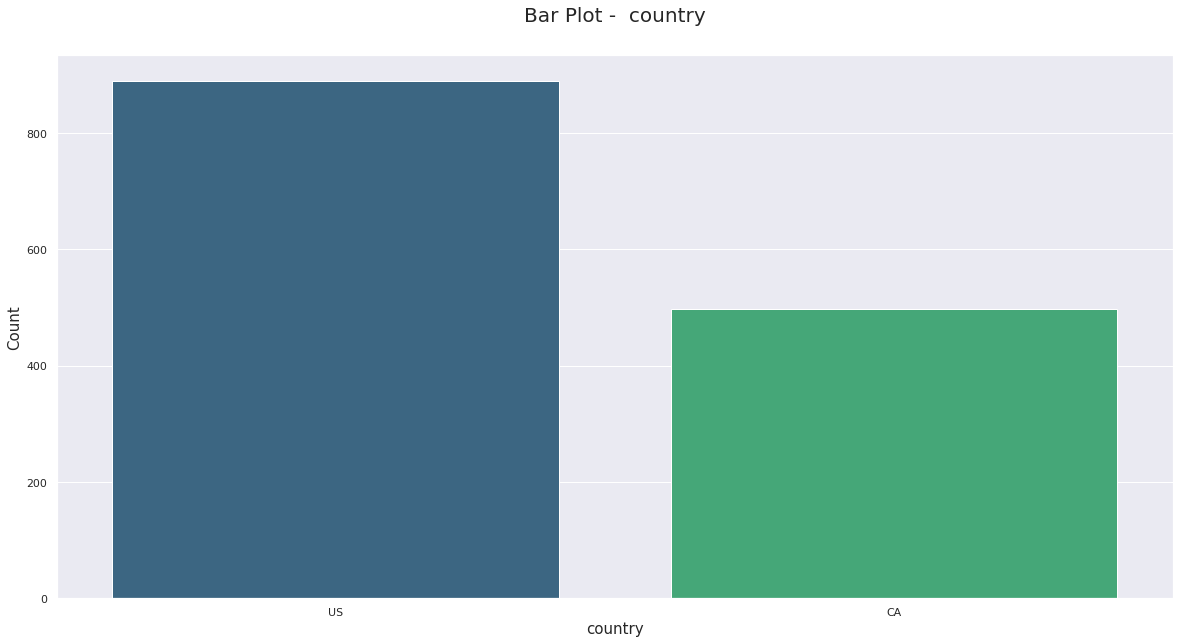

In [ ]:
# country count plot
CatPlots('country', df)

Majority of the employees are from US

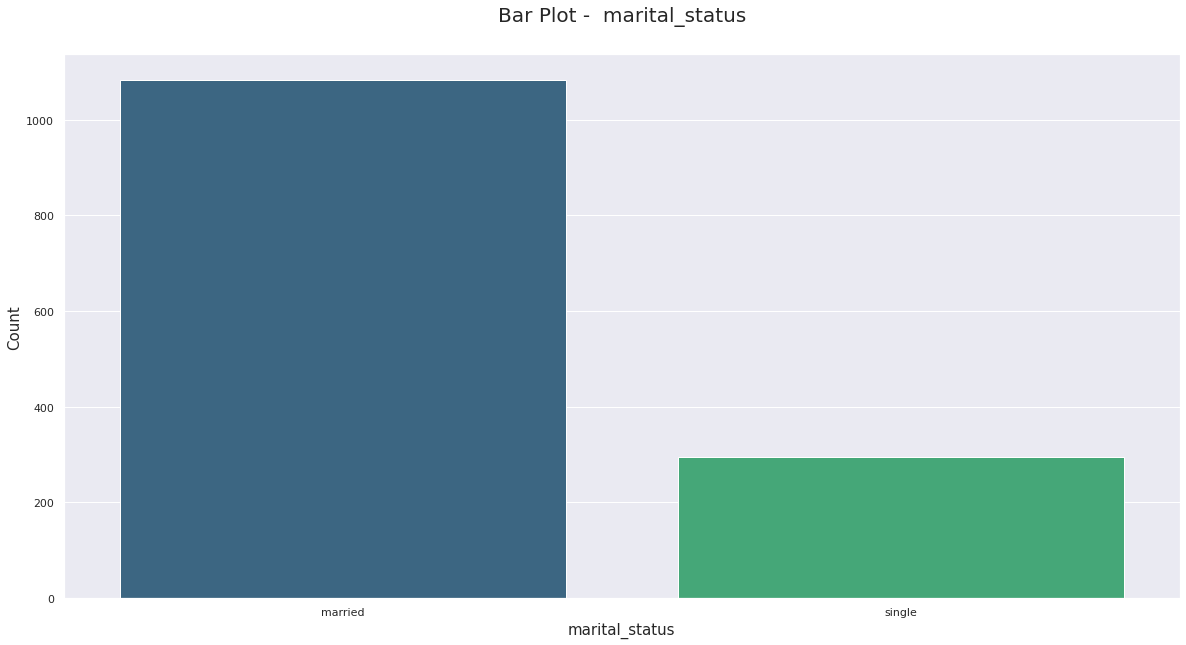

In [ ]:
# marital_status' count plot
CatPlots('marital_status', df)

majority of the employees are married

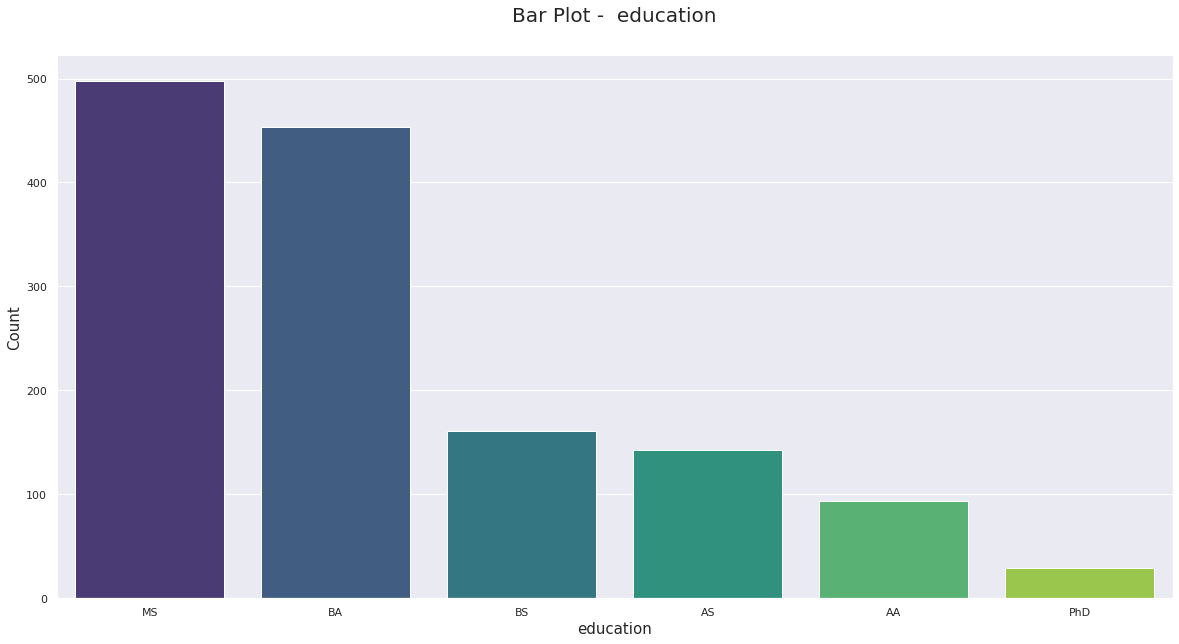

In [ ]:
# education count plot
CatPlots('education', df)

majority of the employees are Masters Degree holders

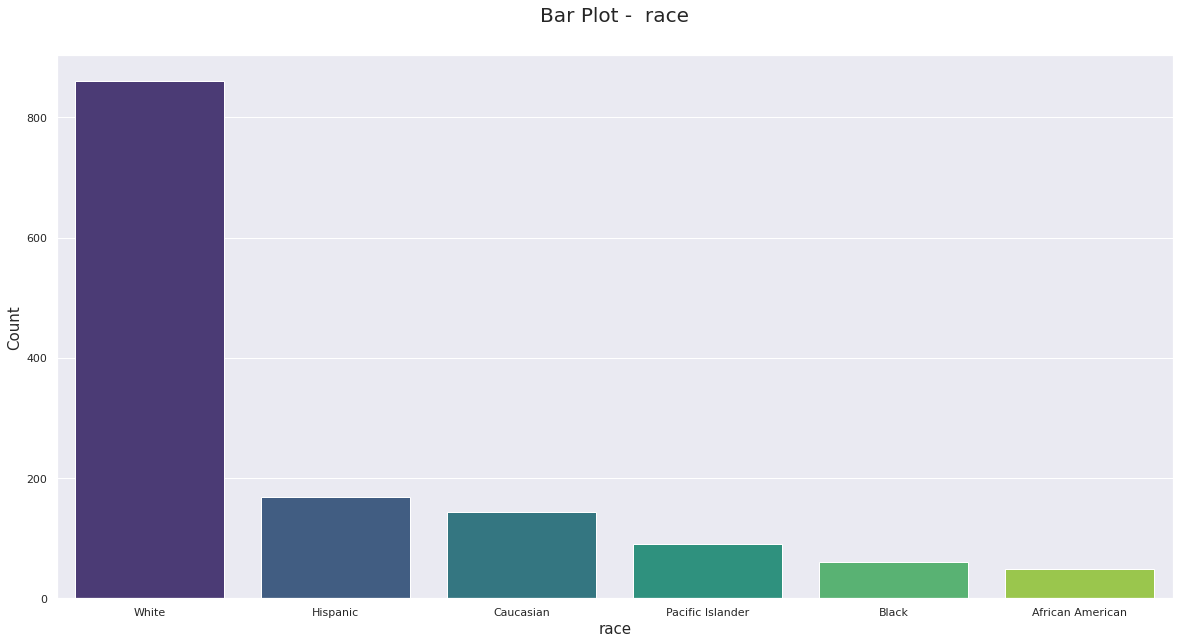

In [ ]:
# race count plot
CatPlots('race', df)

Majority of the employees are white. The company comprises of 6 races.

##### Numerical Analysis

> Measures of Central Tendency and Measures of Dispersion/Variability/Spread, 

In [ ]:
# Describing the Data
df.describe()

,employee_1,age,tenure,annual_compensation,job_satisfaction,engagement,proactive,worklifebalance,performance_individual,performance_manager,...,growth,impact,recommend,connection,intention_to_quit,clear_expectations_from_manager,proud,believe_in_mission,trust_in_leadership,kids
count,1388.000000,1388.000000,1388.000000,1303.000000,1387.000000,1387.000000,1382.000000,1385.000000,1334.000000,1387.000000,...,1387.000000,1382.000000,1384.000000,1385.000000,1380.000000,1379.000000,1376.000000,1381.000000,1382.000000,1318.000000
mean,694.500000,39.776657,1.877522,85843.592477,2.648882,4.306417,3.487699,4.361011,3.232384,3.387167,...,2.053353,1.934153,1.632225,1.679422,2.884783,2.545323,2.486919,2.735699,2.317656,1.279211
std,400.825398,11.676015,0.791619,47173.549630,0.945867,0.743792,0.854045,0.744680,0.801331,1.077479,...,0.815635,0.754906,0.653044,0.657144,1.790046,1.887226,1.759703,1.106152,1.004533,1.201508
min,1.000000,18.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,347.750000,31.000000,1.500000,58930.928500,2.000000,4.000000,3.000000,4.000000,3.000000,2.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,694.500000,41.000000,2.000000,80000.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000
75%,1041.250000,48.000000,2.000000,104000.000000,3.000000,5.000000,4.000000,5.000000,4.000000,4.000000,...,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
max,1388.000000,70.000000,3.500000,956000.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,5.000000,5.000000,4.000000,5.000000,7.000000,7.000000,7.000000,5.000000,5.000000,8.000000


In [ ]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [ ]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [ ]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [ ]:
# Numerical columns
numerical = df.select_dtypes(exclude = 'object').columns.tolist()
numerical

['employee_1',
 'age',
 'tenure',
 'annual_compensation',
 'job_satisfaction',
 'engagement',
 'proactive',
 'worklifebalance',
 'performance_individual',
 'performance_manager',
 'career_satisfaction',
 'meaning',
 'autonomy',
 'growth',
 'impact',
 'recommend',
 'connection',
 'intention_to_quit',
 'clear_expectations_from_manager',
 'proud',
 'believe_in_mission',
 'trust_in_leadership',
 'kids']

In [ ]:
# Mean
MeasureCentral('mean', numerical, df)

employee_1 column mean = 694.5
age column mean = 39.77665706051873
tenure column mean = 1.877521613832853
annual_compensation column mean = 85843.59247695396
job_satisfaction column mean = 2.6488824801730355
engagement column mean = 4.3064167267483775
proactive column mean = 3.487698986975398
worklifebalance column mean = 4.3610108303249095
performance_individual column mean = 3.232383808095952
performance_manager column mean = 3.3871665465032446
career_satisfaction column mean = 2.880780346820809
meaning column mean = 3.2651734104046244
autonomy column mean = 3.308972503617945
growth column mean = 2.053352559480894
impact column mean = 1.9341534008683068
recommend column mean = 1.6322254335260116
connection column mean = 1.6794223826714803
intention_to_quit column mean = 2.884782608695652
clear_expectations_from_manager column mean = 2.5453226976069616
proud column mean = 2.4869186046511627
believe_in_mission column mean = 2.735698769007965
trust_in_leadership column mean = 2.31765557

In [ ]:
# Median
MeasureCentral('median', numerical, df)

employee_1 column median = 694.5
age column median = 41.0
tenure column median = 2.0
annual_compensation column median = 80000.0
job_satisfaction column median = 3.0
engagement column median = 4.0
proactive column median = 4.0
worklifebalance column median = 4.0
performance_individual column median = 3.0
performance_manager column median = 4.0
career_satisfaction column median = 3.0
meaning column median = 3.0
autonomy column median = 3.0
growth column median = 2.0
impact column median = 2.0
recommend column median = 2.0
connection column median = 2.0
intention_to_quit column median = 3.0
clear_expectations_from_manager column median = 2.0
proud column median = 2.0
believe_in_mission column median = 3.0
trust_in_leadership column median = 2.0
kids column median = 1.0


In [ ]:
# Mode
MeasureCentral('mode', numerical, df)

employee_1 column mode = 0          1
1          2
2          3
3          4
4          5
        ... 
1383    1384
1384    1385
1385    1386
1386    1387
1387    1388
Length: 1388, dtype: int64
age column mode = 0    21
dtype: int64
tenure column mode = 0    2.0
dtype: float64
annual_compensation column mode = 0    100000.0
dtype: float64
job_satisfaction column mode = 0    3.0
dtype: float64
engagement column mode = 0    5.0
dtype: float64
proactive column mode = 0    4.0
dtype: float64
worklifebalance column mode = 0    5.0
dtype: float64
performance_individual column mode = 0    4.0
dtype: float64
performance_manager column mode = 0    4.0
dtype: float64
career_satisfaction column mode = 0    2.0
dtype: float64
meaning column mode = 0    4.0
dtype: float64
autonomy column mode = 0    4.0
dtype: float64
growth column mode = 0    2.0
dtype: float64
impact column mode = 0    2.0
dtype: float64
recommend column mode = 0    2.0
dtype: float64
connection column mode = 0    2.0
dtype: flo

In [ ]:
# Range
MeasureDistribution('range', numerical, df)

employee_1 column range = 1387
age column range = 52
tenure column range = 3.0
annual_compensation column range = 956000.0
job_satisfaction column range = 4.0
engagement column range = 4.0
proactive column range = 4.0
worklifebalance column range = 4.0
performance_individual column range = 3.0
performance_manager column range = 4.0
career_satisfaction column range = 4.0
meaning column range = 4.0
autonomy column range = 4.0
growth column range = 4.0
impact column range = 4.0
recommend column range = 3.0
connection column range = 4.0
intention_to_quit column range = 6.0
clear_expectations_from_manager column range = 6.0
proud column range = 6.0
believe_in_mission column range = 4.0
trust_in_leadership column range = 4.0
kids column range = 8.0


In [ ]:
# IQR
MeasureDistribution('IQR', numerical, df)

employee_1 column IQR = 693.5
age column IQR = 17.0
tenure column IQR = 0.5
annual_compensation column IQR = 45069.0715
job_satisfaction column IQR = 1.0
engagement column IQR = 1.0
proactive column IQR = 1.0
worklifebalance column IQR = 1.0
performance_individual column IQR = 1.0
performance_manager column IQR = 2.0
career_satisfaction column IQR = 2.0
meaning column IQR = 2.0
autonomy column IQR = 1.0
growth column IQR = 0.0
impact column IQR = 1.0
recommend column IQR = 1.0
connection column IQR = 1.0
intention_to_quit column IQR = 3.0
clear_expectations_from_manager column IQR = 3.0
proud column IQR = 2.0
believe_in_mission column IQR = 2.0
trust_in_leadership column IQR = 1.0
kids column IQR = 2.0


In [ ]:
# Variance
MeasureDistribution('var', numerical, df)

employee_1 column variance = 160661.0
age column variance = 136.32931772801774
tenure column variance = 0.6266609043630752
annual_compensation column variance = 2225343784.692419
job_satisfaction column variance = 0.8946650561646918
engagement column variance = 0.5532271941788822
proactive column variance = 0.729392384343647
worklifebalance column variance = 0.5545481104317658
performance_individual column variance = 0.642131297442059
performance_manager column variance = 1.1609607247675002
career_satisfaction column variance = 1.1737735048629305
meaning column variance = 1.0409843516858308
autonomy column variance = 0.9928086466003926
growth column variance = 0.6652611187578732
impact column variance = 0.5698826643584383
recommend column variance = 0.4264661935392141
connection column variance = 0.43183781640616187
intention_to_quit column variance = 3.20426427467919
clear_expectations_from_manager column variance = 3.561623607692026
proud column variance = 3.096556025370024
believe_i

In [ ]:
# Standard Deviation
MeasureDistribution('std', numerical, df)

employee_1 column std = 400.8253983968581
age column std = 11.676014633770281
tenure column std = 0.7916191662428818
annual_compensation column std = 47173.549629982466
job_satisfaction column std = 0.9458673565382685
engagement column std = 0.7437924402539208
proactive column std = 0.8540447203417669
worklifebalance column std = 0.7446798711068843
performance_individual column std = 0.8013309537526047
performance_manager column std = 1.0774788743949926
career_satisfaction column std = 1.0834082817031307
meaning column std = 1.0202864066946256
autonomy column std = 0.9963978355056742
growth column std = 0.8156354079843967
impact column std = 0.7549057321006631
recommend column std = 0.6530437914406767
connection column std = 0.6571436801842971
intention_to_quit column std = 1.7900458861937563
clear_expectations_from_manager column std = 1.8872264325438075
proud column std = 1.7597033913049165
believe_in_mission column std = 1.106152114538712
trust_in_leadership column std = 1.004533245

In [ ]:
# Skew
MeasureDistribution('skew', numerical, df)

employee_1 column skew = 0.0
age column skew = -0.07763037085651693
tenure column skew = -0.10746117532501062
annual_compensation column skew = 6.623896927998643
job_satisfaction column skew = 0.3510979560709007
engagement column skew = -1.0250438009673235
proactive column skew = -0.5728290525100603
worklifebalance column skew = -1.2096914830585068
performance_individual column skew = -0.6971664191309033
performance_manager column skew = -0.34105433600536267
career_satisfaction column skew = 0.22773396639495766
meaning column skew = -0.06961032443798837
autonomy column skew = -0.14267517742209404
growth column skew = 0.8525036635529494
impact column skew = 0.8476257767634949
recommend column skew = 0.7659431982980544
connection column skew = 0.8323205927930231
intention_to_quit column skew = 0.8617731421729865
clear_expectations_from_manager column skew = 1.0988503285815183
proud column skew = 1.1665549580619639
believe_in_mission column skew = -0.13332565347061714
trust_in_leadership 

In [ ]:
# Kurtosis
MeasureDistribution('kurt', numerical, df)

employee_1 column kurt = -1.1999999999999997
age column kurt = -0.8056249556094315
tenure column kurt = -0.5881625271310948
annual_compensation column kurt = 103.29711924622451
job_satisfaction column kurt = -0.07855419944262598
engagement column kurt = 1.3506248083349925
proactive column kurt = 0.02856703570204111
worklifebalance column kurt = 1.9519652027656762
performance_individual column kurt = -0.3776091024459398
performance_manager column kurt = -0.8683289343305165
career_satisfaction column kurt = -0.8290628780656903
meaning column kurt = -0.9082367631948838
autonomy column kurt = -0.8124718981549064
growth column kurt = 0.8733030949354421
impact column kurt = 1.1428713540266933
recommend column kurt = 0.48489500882668146
connection column kurt = 1.365141082580982
intention_to_quit column kurt = -0.09547479433232375
clear_expectations_from_manager column kurt = 0.1277686726999656
proud column kurt = 0.5241286982377602
believe_in_mission column kurt = -0.9105183551243226
trust_i

#### b) Bivariate Analysis

##### Numerical and Numerical

> Scatter plots, correlations etc

<Figure size 1440x576 with 0 Axes>

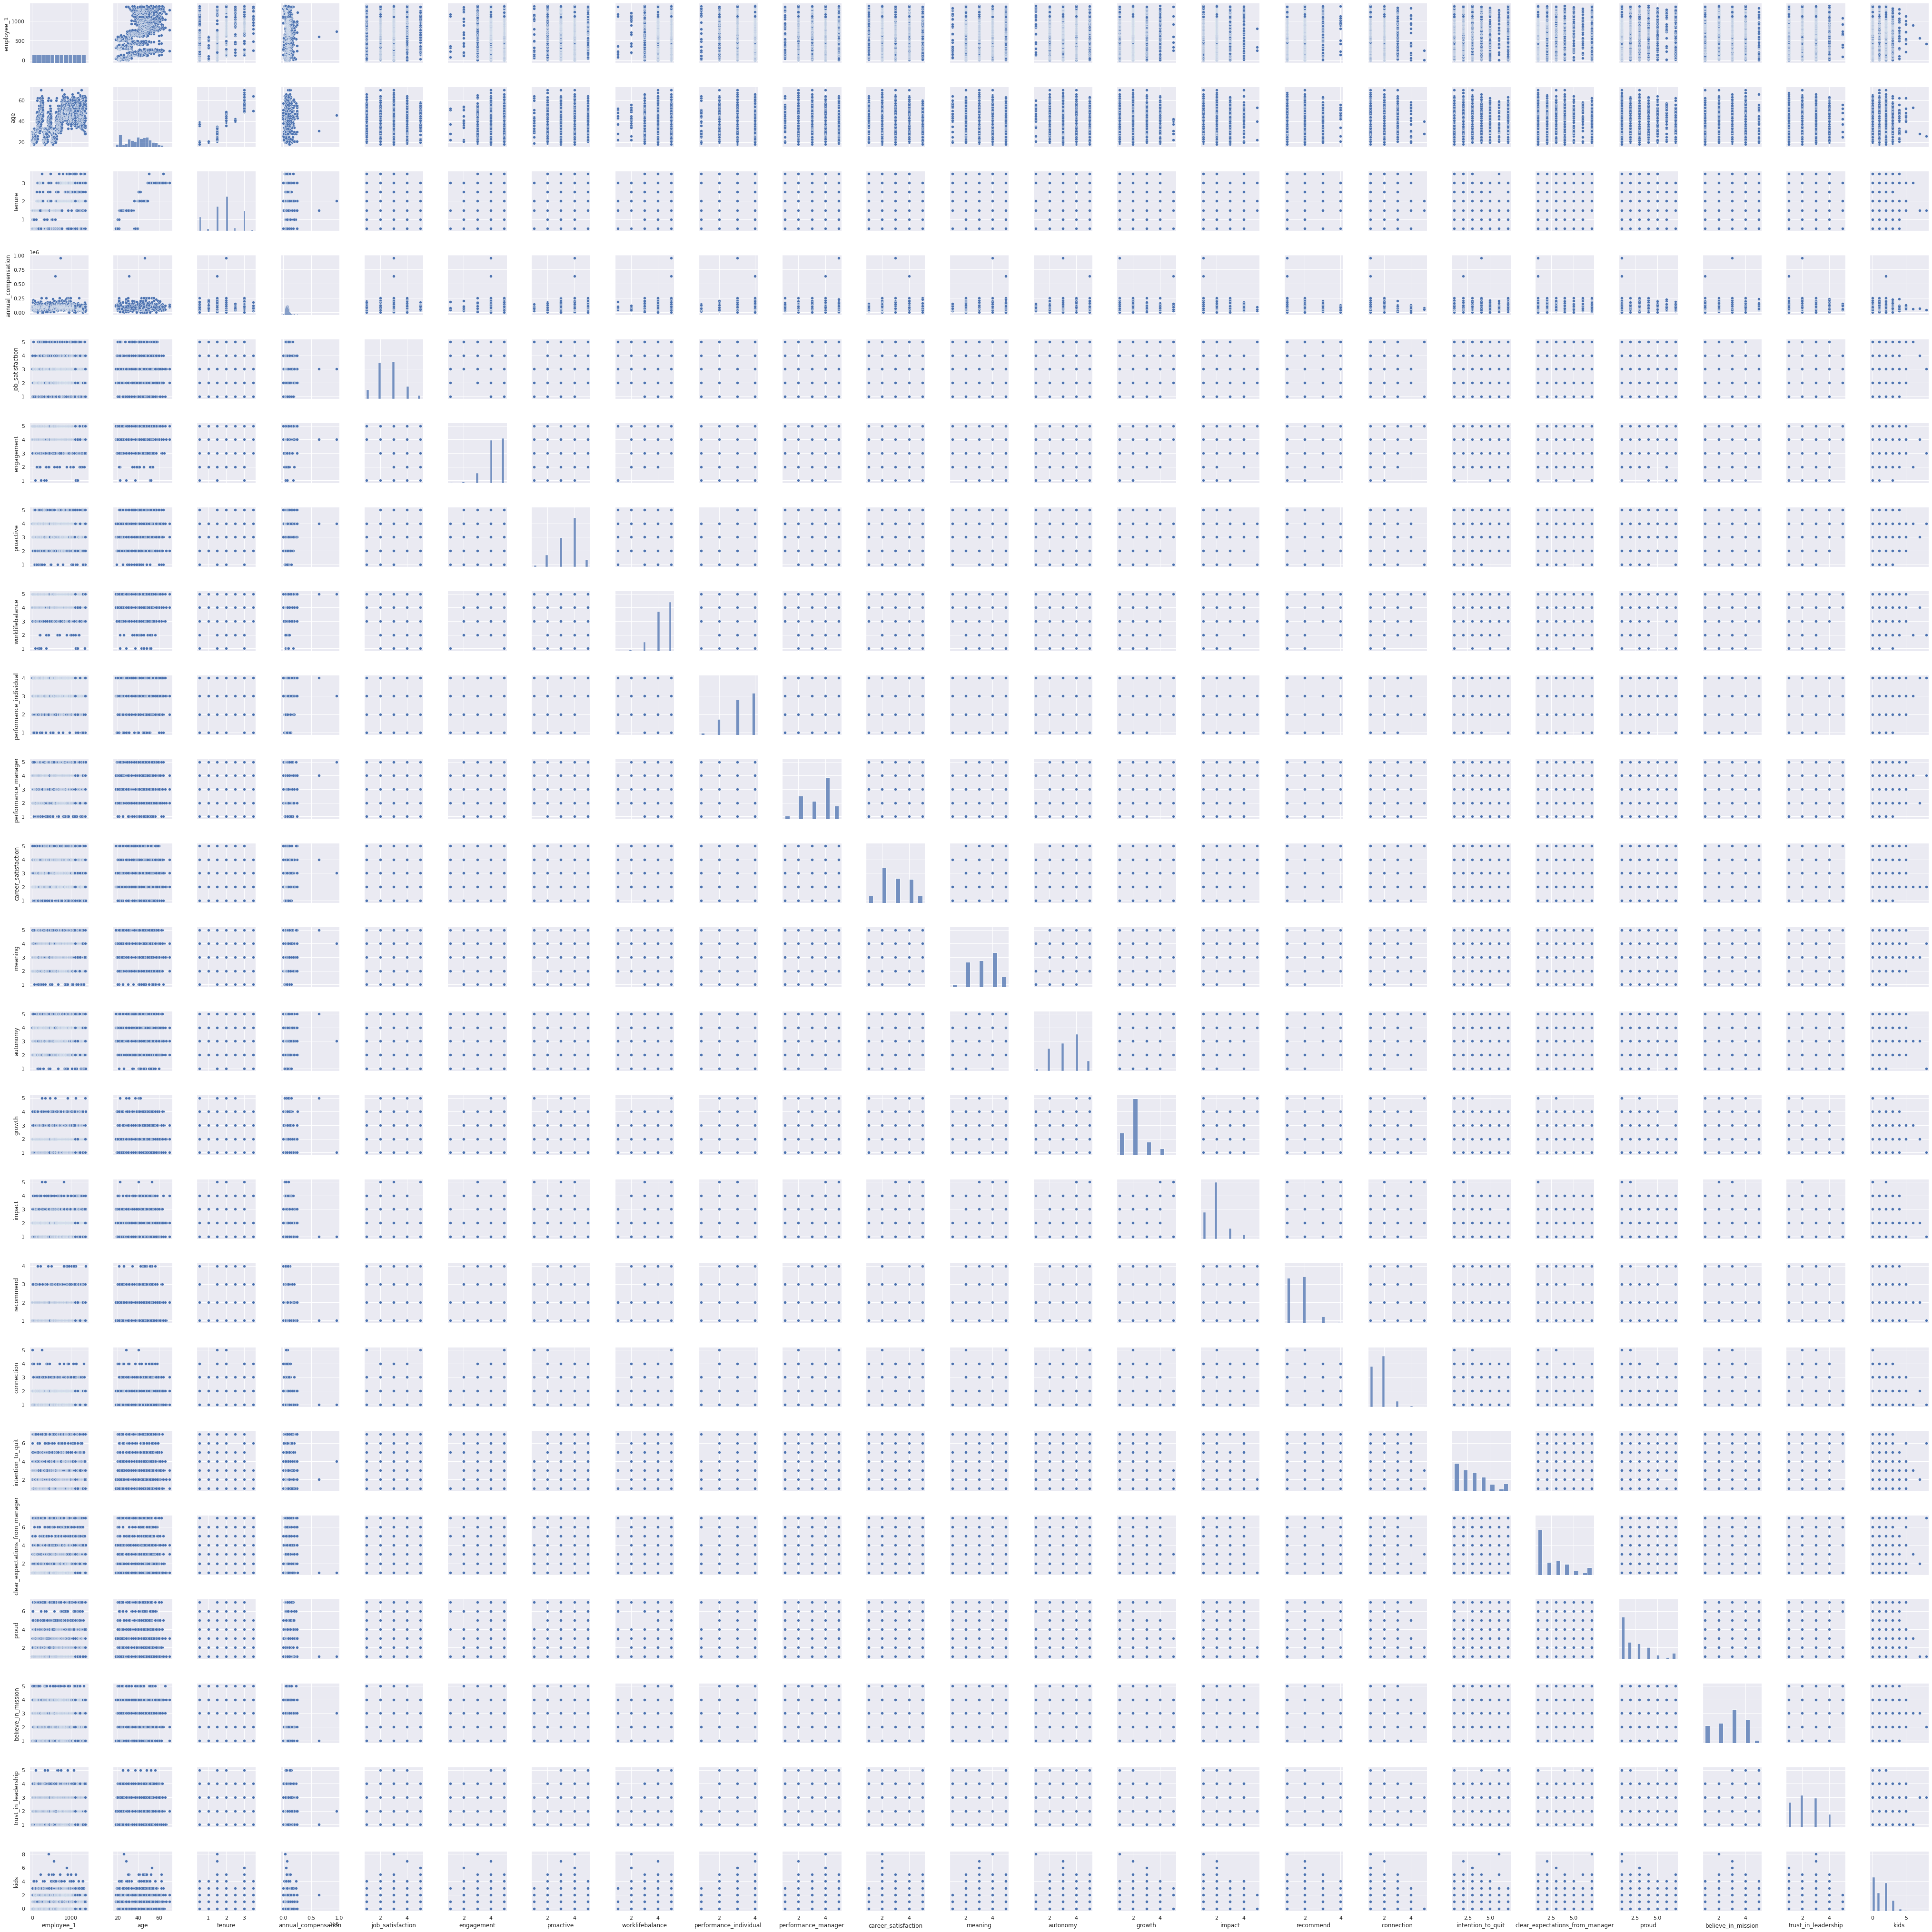

In [ ]:
# Explore the types of relationships across the entire data set.
plt.figure(figsize=(20,8))
sb.pairplot(df)

> From the pairplots, it's hard to see any forms of correlations yet


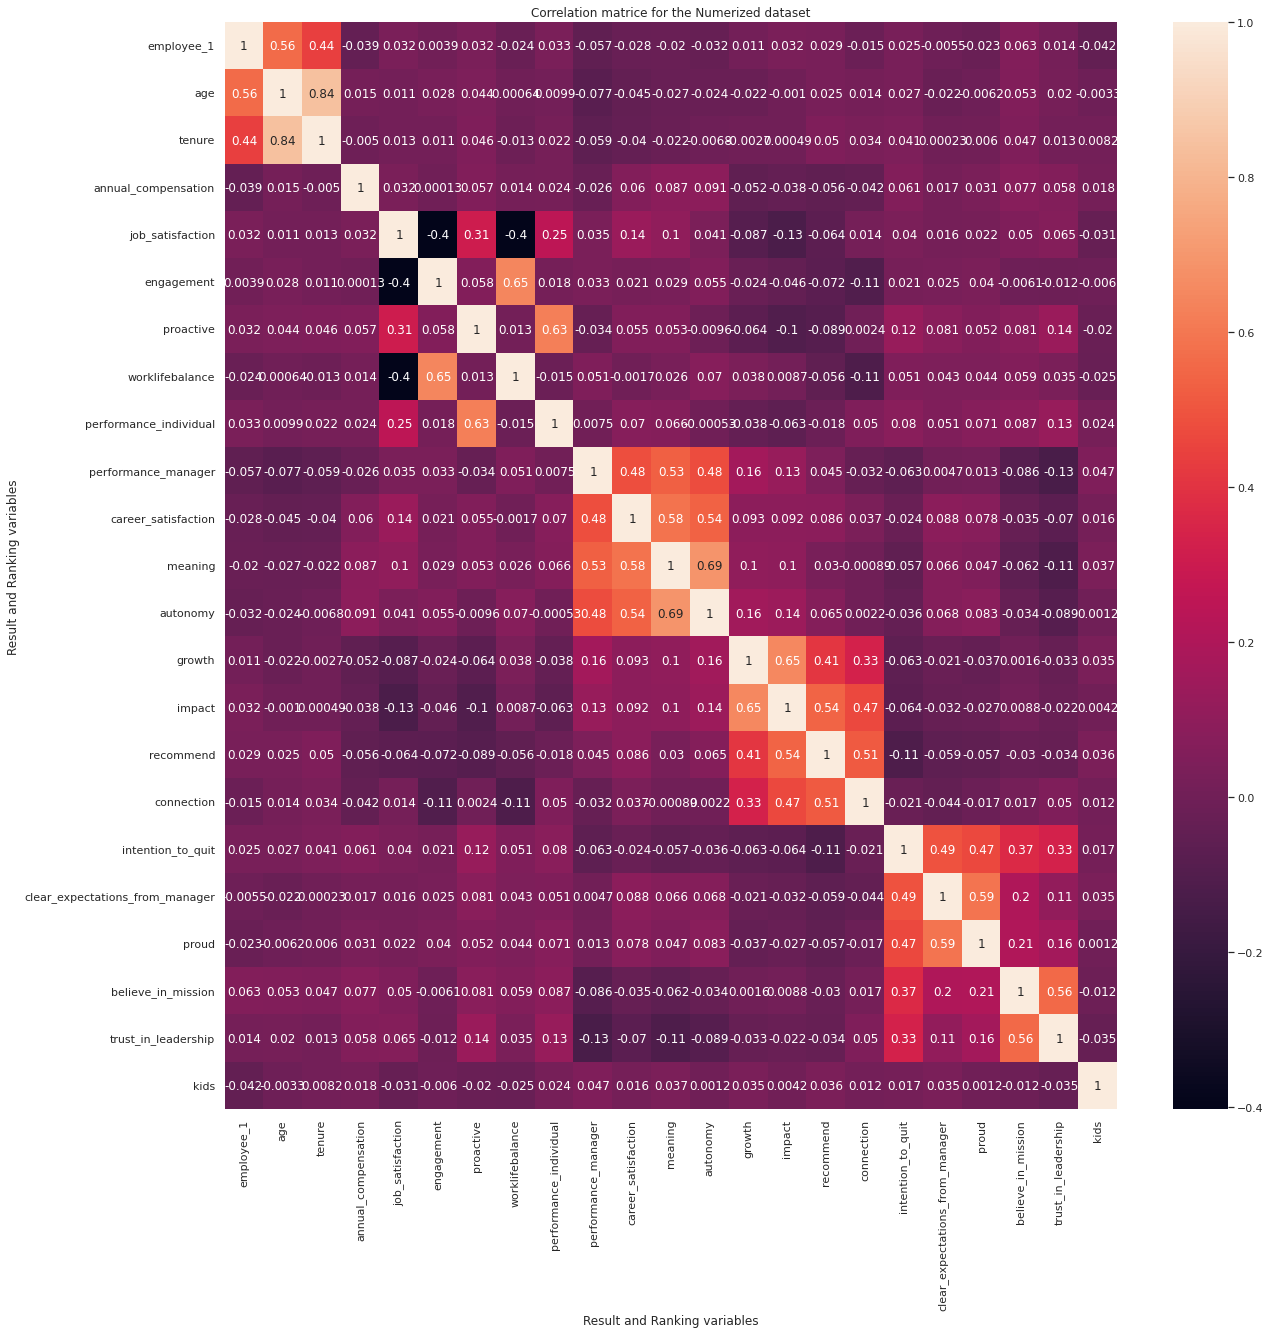

In [ ]:
# Heatmap of correlation
plt.figure(figsize=(20,20))
corr_matrix = df.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Result and Ranking variables")

plt.ylabel("Result and Ranking variables")

plt.show()

We see a strong correlation (c>0.5) between:

* tenure and age
* age and employee_1
* worklifebalance and engagement
* perfomance_individual and proactive
* meaning and perfomance_manager
* meaning and career_satisfaction
* autonomy and career_satisfaction
* autonomy and meaning
* impact and growth
* reccomend and impact
* connection and reccomend
* proud and clear_expectations_from_manager
* trust_in_leadership and believe_in_mission

We see a weak correlation (0.2<c<0.5) between:

* 
*



There is hardly a correlation between the remaining pairs ( c<0.2)

In [ ]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  sb.set_style('whitegrid')
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

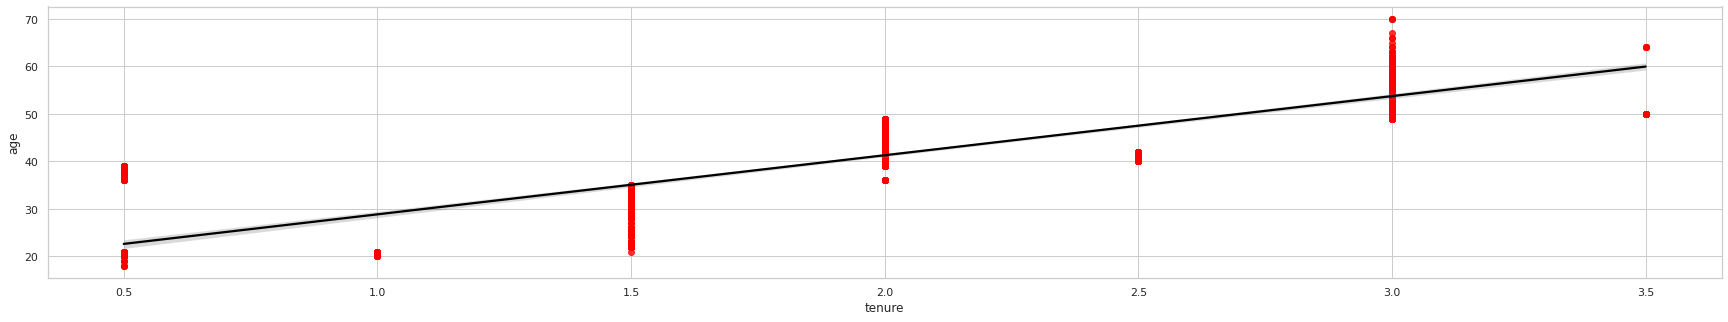

In [ ]:
# tenure and age
cor(df.tenure,df.age,df)

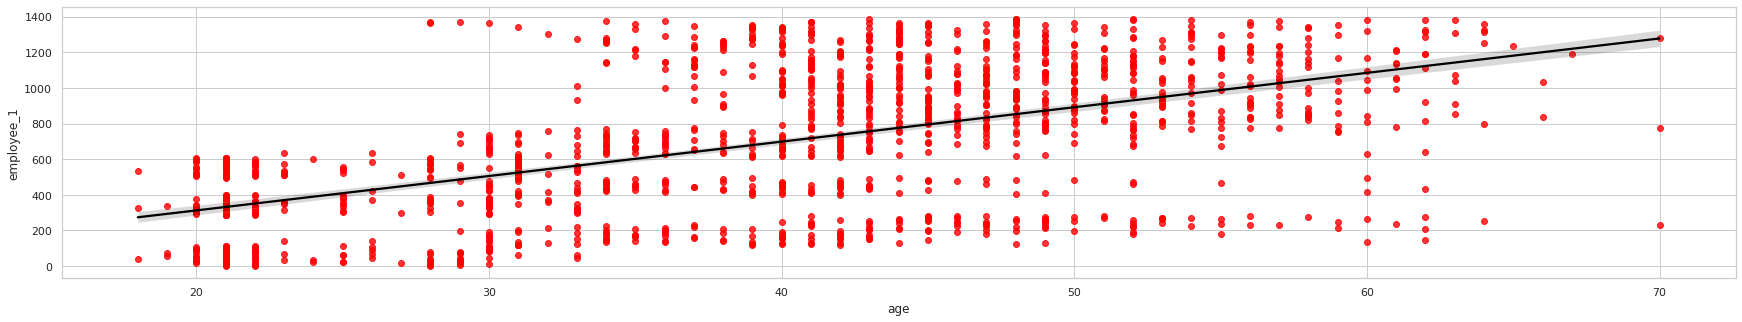

In [ ]:
# age and employee_1
cor(df.age,df.employee_1,df)

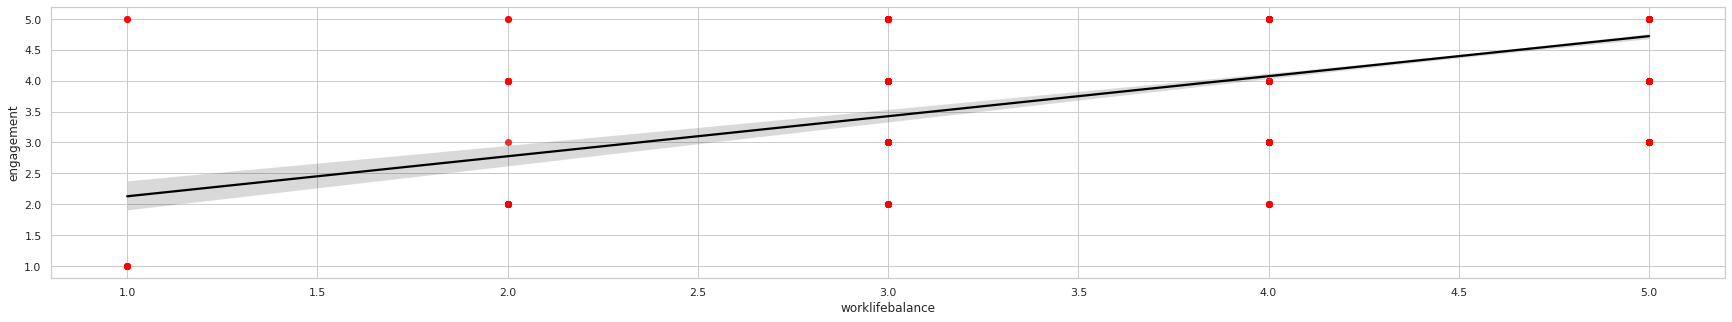

In [ ]:
# worklifebalance and engagement
cor(df.worklifebalance,df.engagement,df)

In [ ]:
df.columns

Index(['employee_1', 'gender_1', 'age', 'department', 'status', 'tenure',
       'turnover', 'turnover1', 'annual_compensation', 'country',
       'job_satisfaction', 'engagement', 'proactive', 'worklifebalance',
       'performance_individual', 'performance_manager', 'career_satisfaction',
       'meaning', 'autonomy', 'growth', 'impact', 'recommend', 'connection',
       'intention_to_quit', 'clear_expectations_from_manager', 'proud',
       'believe_in_mission', 'trust_in_leadership', 'marital_status', 'kids',
       'education', 'race'],
      dtype='object')

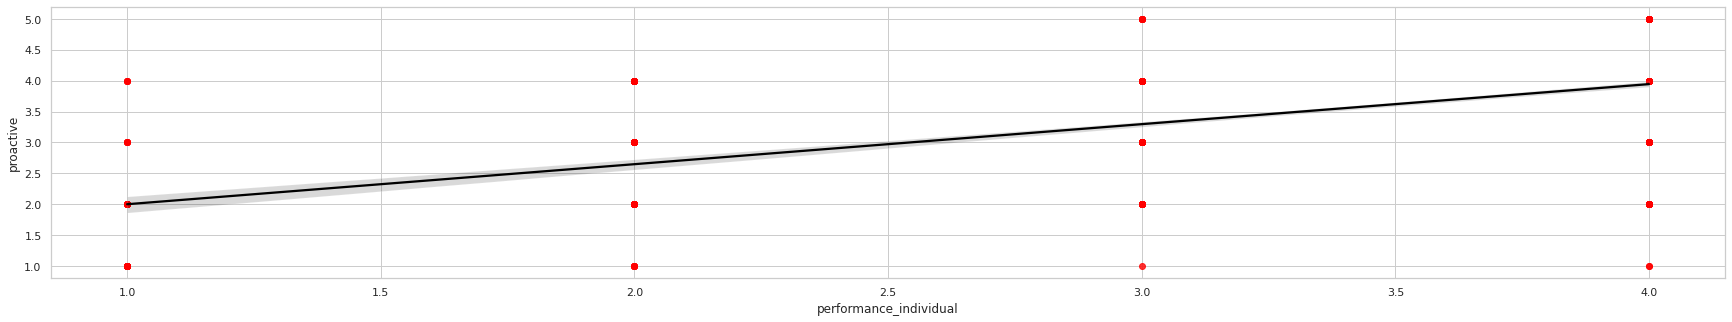

In [ ]:
# performance_individual and proactive
cor(df.performance_individual,df.proactive,df)

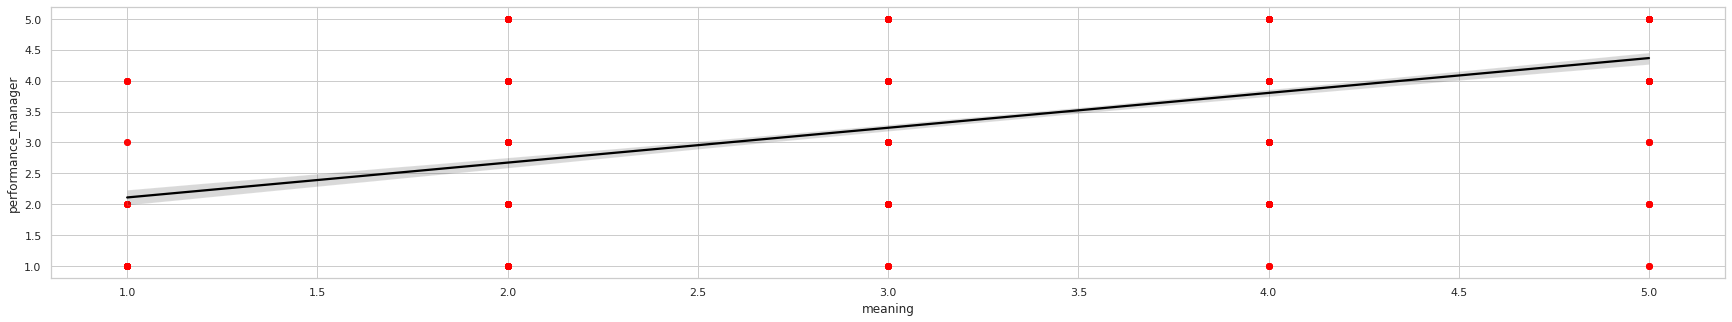

In [ ]:
# meaning and perfomance_manager
cor(df.meaning,df.performance_manager,df)

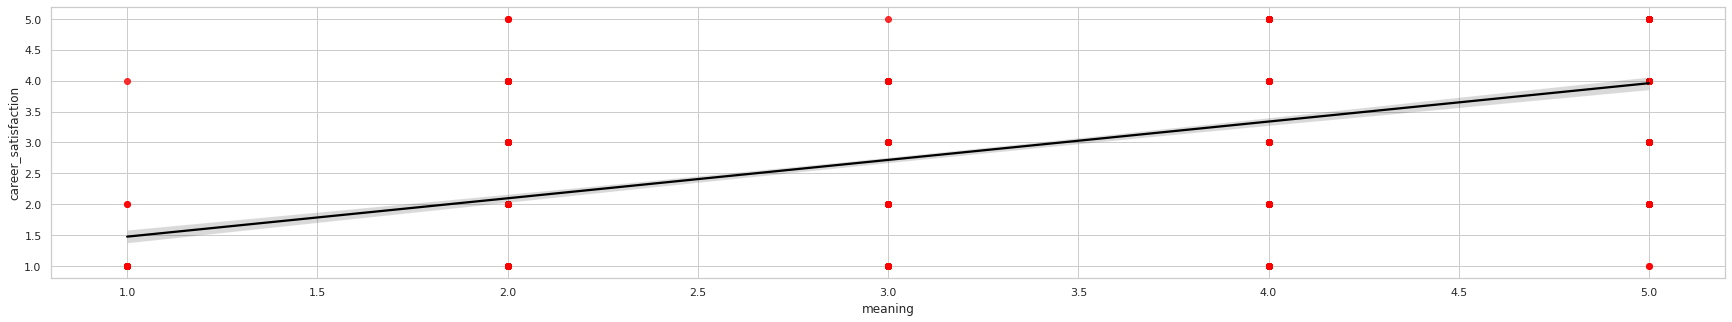

In [ ]:
# meaning and career_satisfaction
cor(df.meaning,df.career_satisfaction,df)

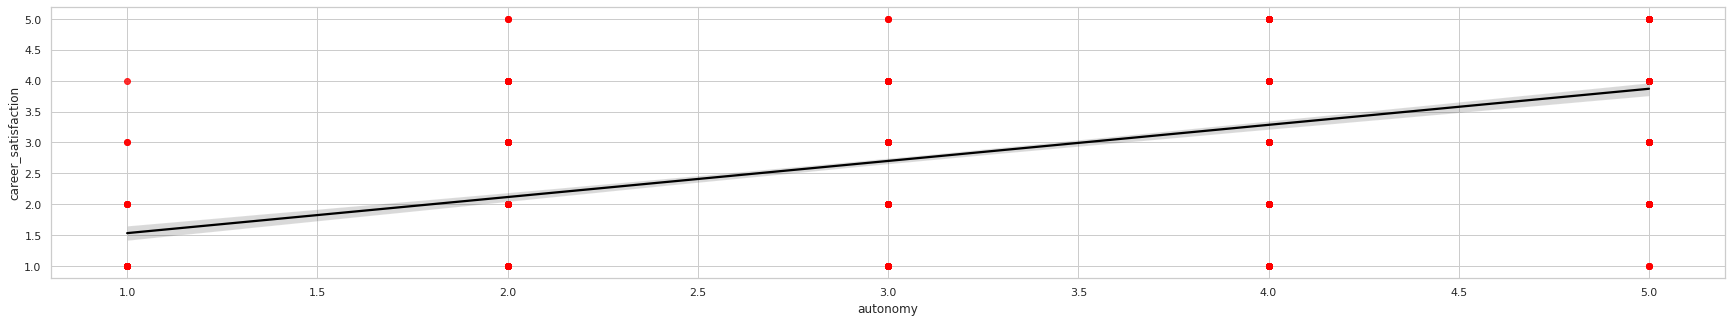

In [ ]:
# autonomy and career_satisfaction
cor(df.autonomy,df.career_satisfaction,df)

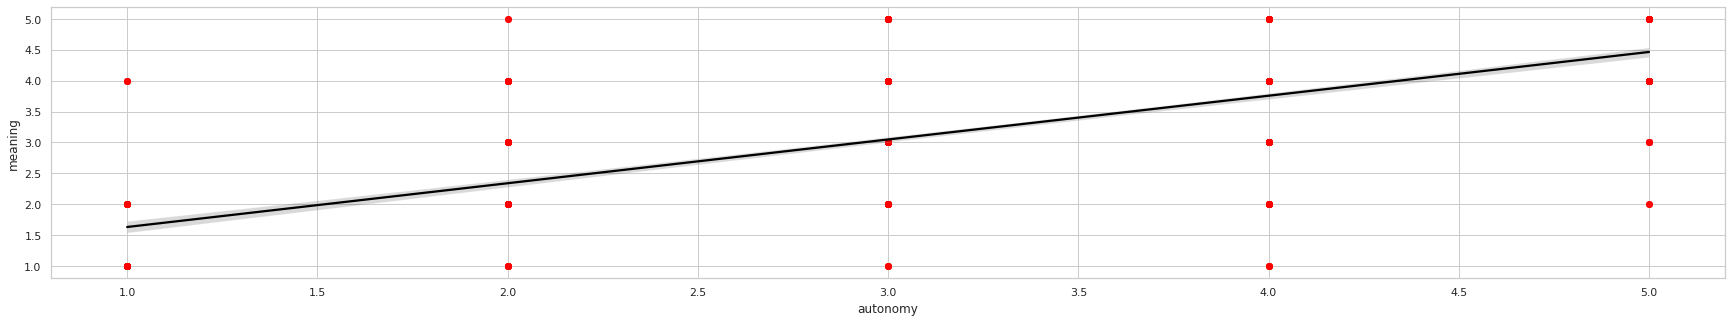

In [ ]:
# autonomy and meaning
cor(df.autonomy,df.meaning,df)

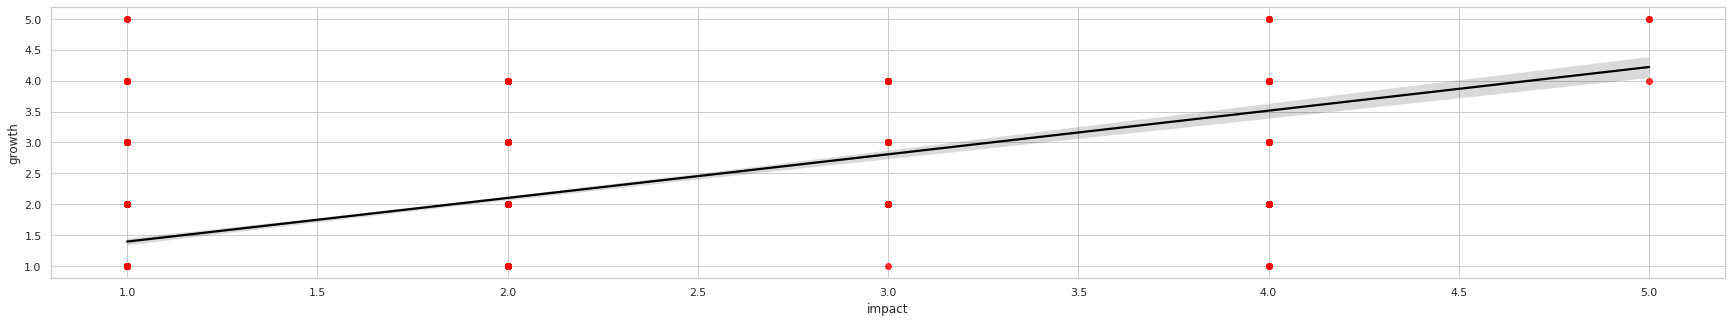

In [ ]:
# impact and growth
cor(df.impact,df.growth,df)

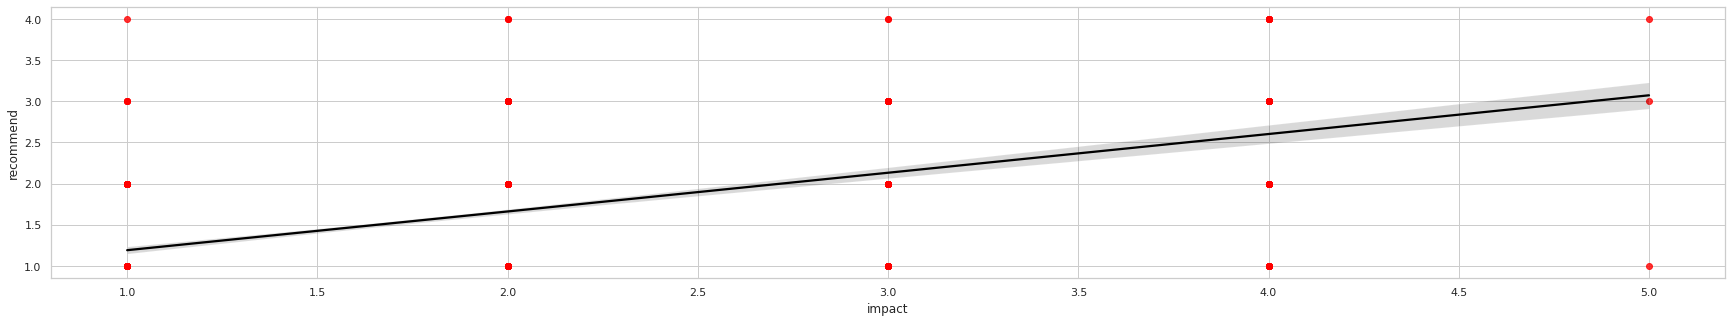

In [ ]:
# reccomend and impact
cor(df.impact,df.recommend,df)

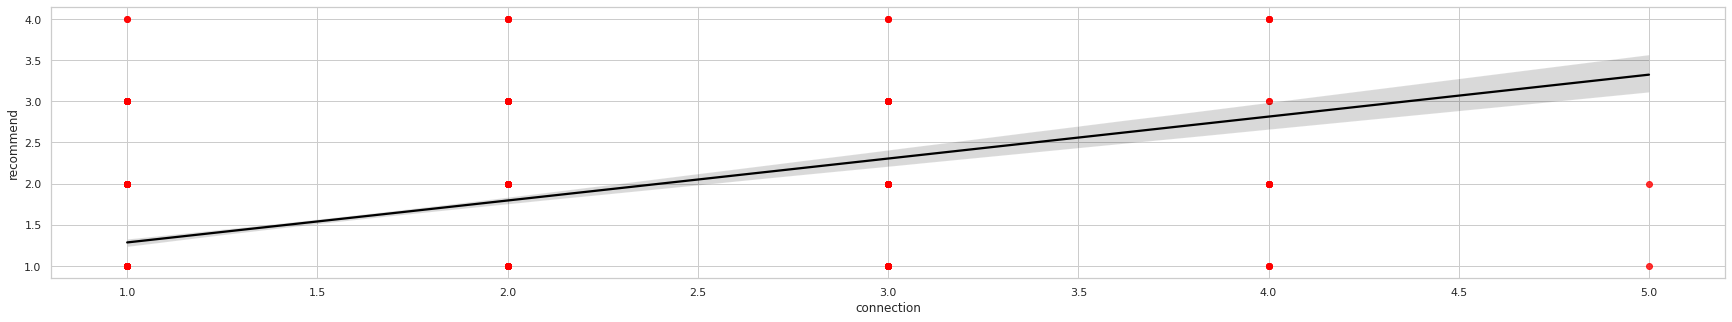

In [ ]:
# connection and reccomend
cor(df.connection,df.recommend,df)

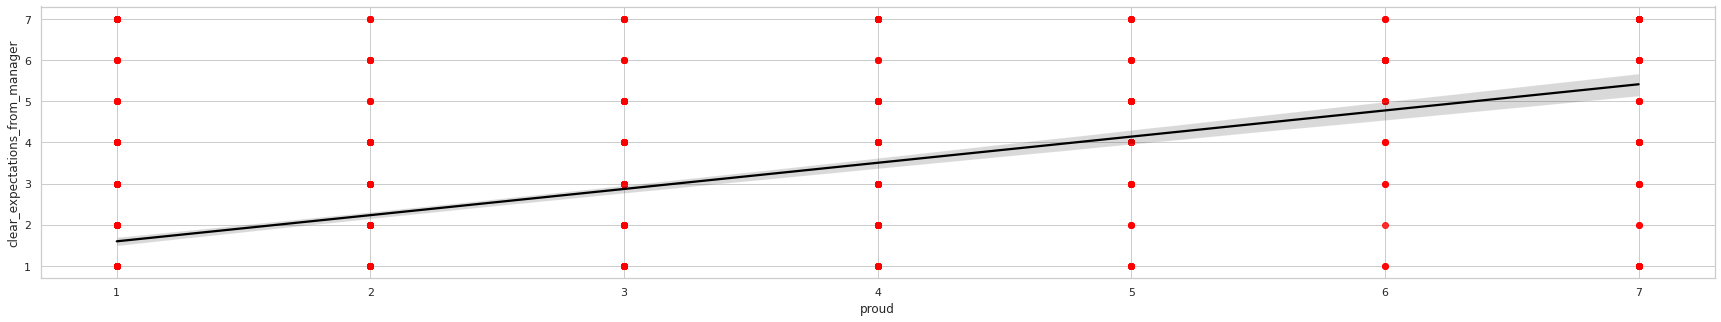

In [ ]:
# proud and clear_expectations_from_manager
cor(df.proud,df.clear_expectations_from_manager,df)

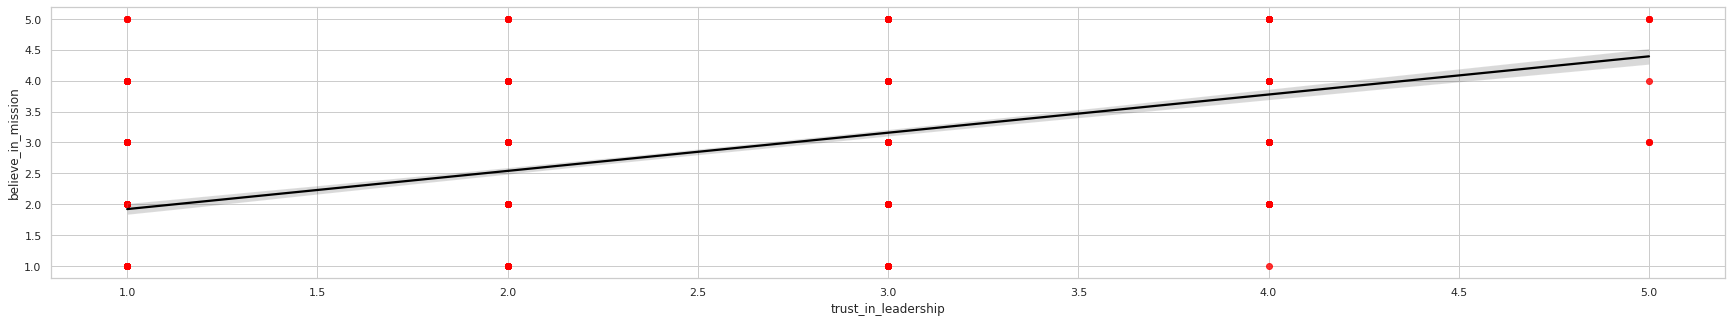

In [ ]:
# proud and clear_expectations_from_manager
cor(df.trust_in_leadership,df.believe_in_mission,df)

##### Categorical and Categorical

> Stacked column charts etc

##### Categorical and Numerical

> Z-test, T-test, Line charts etc

#### c) Multivariet Analysis

> Feature reduction (LDA, PCA, FA etc), Feature selection, Feature Engineering, One-Hot Encoding, Label Encoding, Multicollinearity check etc.

##### Multicollinearity Check

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [ ]:
# calculating VIF for each feature
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [ ]:
VIF(df)

,employee_1,age,tenure,annual_compensation,job_satisfaction,engagement,proactive,worklifebalance,performance_individual,performance_manager,...,growth,impact,recommend,connection,intention_to_quit,clear_expectations_from_manager,proud,believe_in_mission,trust_in_leadership,kids
employee_1,1.501807,-1.002089,0.191987,0.075662,-0.036807,-0.026710,0.033217,0.049718,-0.065076,0.035575,...,-0.020264,-0.073551,-0.032191,0.095656,-0.031719,-0.030415,0.063871,-0.069350,0.036879,0.062164
age,-1.002089,4.176496,-3.083100,-0.107452,-0.013078,-0.059512,-0.061036,-0.039297,0.107992,0.071807,...,0.101101,-0.073966,0.071087,-0.014059,0.045614,0.109882,-0.051698,-0.012987,-0.025681,-0.020093
tenure,0.191987,-3.083100,3.530044,0.070070,0.019679,0.024100,-0.017161,0.043905,-0.048119,-0.018691,...,-0.068648,0.123615,-0.120872,-0.043205,-0.074002,-0.051843,0.019474,-0.014222,0.045042,-0.019696
annual_compensation,0.075662,-0.107452,0.070070,1.040599,-0.002579,0.023261,-0.050926,-0.016681,0.019428,0.113414,...,0.045194,-0.017200,0.028473,0.030119,-0.048844,0.040642,-0.001084,-0.061366,-0.012836,-0.024169
job_satisfaction,-0.036807,-0.013078,0.019679,-0.002579,1.510344,0.415228,-0.381531,0.347224,-0.107029,-0.018161,...,-0.001758,0.179524,0.039875,-0.028137,-0.008663,0.037804,-0.019274,-0.049314,-0.022243,0.052691
engagement,-0.026710,-0.059512,0.024100,0.023261,0.415228,1.871594,-0.195175,-1.048738,-0.024490,0.013216,...,0.046153,0.089744,0.027894,0.007634,0.013455,0.035936,-0.055481,0.050422,0.030680,-0.009055
proactive,0.033217,-0.061036,-0.017161,-0.050926,-0.381531,-0.195175,1.805128,-0.062770,-1.011606,0.089130,...,-0.032246,0.022907,0.095452,-0.023851,-0.101033,-0.090560,0.103836,0.058579,-0.082774,0.046363
worklifebalance,0.049718,-0.039297,0.043905,-0.016681,0.347224,-1.048738,-0.062770,1.861356,-0.001726,-0.058613,...,-0.093467,-0.027825,0.023293,0.124179,-0.035983,-0.019087,0.014725,-0.096801,-0.043036,0.053098
performance_individual,-0.065076,0.107992,-0.048119,0.019428,-0.107029,-0.024490,-1.011606,-0.001726,1.688652,-0.038788,...,0.012933,0.056267,-0.059257,-0.078317,0.042777,0.051483,-0.099182,-0.040462,-0.060379,-0.064567
performance_manager,0.035575,0.071807,-0.018691,0.113414,-0.018161,0.013216,0.089130,-0.058613,-0.038788,1.590362,...,-0.137379,-0.062420,0.028363,0.125020,-0.034412,0.076437,-0.004288,0.026453,0.078852,-0.047723


> We don't have any VIF above 5 hence our dataset has no multicollinearity

##### One-Hot Encoding

In [ ]:
# One-hot encoding categorical columns
df = pd.get_dummies(df)
# Checking changes
df.head()

,employee_1,age,tenure,annual_compensation,job_satisfaction,engagement,proactive,worklifebalance,performance_individual,performance_manager,...,education_BA,education_BS,education_MS,education_PhD,race_African American,race_Black,race_Caucasian,race_Hispanic,race_Pacific Islander,race_White
0,1,22,1.5,78009.6900,3.0,5.0,4.0,5.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,1
1,2,21,0.5,47869.5825,4.0,4.0,4.0,4.0,4.0,4.0,...,1,0,0,0,0,0,0,0,0,1
2,5,21,0.5,40777.7925,4.0,3.0,4.0,5.0,3.0,3.0,...,1,0,0,0,0,0,0,0,0,1
3,6,29,1.5,47514.9930,3.0,5.0,4.0,5.0,4.0,3.0,...,0,0,1,0,0,1,0,0,0,0
4,7,21,0.5,56734.3200,2.0,5.0,4.0,5.0,4.0,5.0,...,1,0,0,0,0,0,0,0,0,1


Our dataset is now ready for modelling

## 7. Modelling

## 8. Implementing the Solution

> Implementing the model

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> No

### c). Did we have the right question?

> Yes